<a href="https://colab.research.google.com/github/mcmejiag14/Deep-Learning/blob/main/Second_Try_Model_with_sigmoid.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import matplotlib.pyplot as plt 
import numpy as np
import cv2
import os
import PIL
import tensorflow as tf 


from tensorflow import keras
from keras import Sequential

In [3]:
from tensorflow.keras import layers 
from tensorflow.keras.callbacks import EarlyStopping 
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten
import pathlib 

In [4]:
data_dir = '/content/drive/MyDrive/Data 2' 
data_dir = pathlib.Path(data_dir) 

In [5]:
data_dir

PosixPath('/content/drive/MyDrive/Data 2')

In [6]:
list(data_dir.glob('*/*.jpg'))

[PosixPath('/content/drive/MyDrive/Data 2/Control/IFIT3 Control 3.jpg'),
 PosixPath('/content/drive/MyDrive/Data 2/Control/IFIT3 Control 2.jpg'),
 PosixPath('/content/drive/MyDrive/Data 2/Control/IFIT3 Control 1.jpg'),
 PosixPath('/content/drive/MyDrive/Data 2/Control/IFIT3 Control 4.jpg'),
 PosixPath('/content/drive/MyDrive/Data 2/Control/IFIT3 Control 5.jpg'),
 PosixPath('/content/drive/MyDrive/Data 2/TatcART/IFIT3 TatcART- 2.jpg'),
 PosixPath('/content/drive/MyDrive/Data 2/TatcART/IFIT3 TatcART- 1.jpg'),
 PosixPath('/content/drive/MyDrive/Data 2/TatcART/IFIT3 TatcART- 4.jpg'),
 PosixPath('/content/drive/MyDrive/Data 2/TatcART/IFIT3 TatcART- 3.jpg'),
 PosixPath('/content/drive/MyDrive/Data 2/cART/IFIT3 cART2.jpg'),
 PosixPath('/content/drive/MyDrive/Data 2/cART/IFIT3 cART 6.jpg'),
 PosixPath('/content/drive/MyDrive/Data 2/cART/IFIT3 cART 3.jpg'),
 PosixPath('/content/drive/MyDrive/Data 2/cART/IFIT3 cART1.jpg'),
 PosixPath('/content/drive/MyDrive/Data 2/cART/IFIT3 cART 5.jpg'),
 Posix

In [7]:
len(list(data_dir.glob('*/*.jpg')))

18

In [8]:
image_count = len(list(data_dir.glob('*/*.jpg')))
image_count

18

In [9]:
Tat = list(data_dir.glob('Tat/*'))
Tat

[PosixPath('/content/drive/MyDrive/Data 2/Tat/IFIT3 Tat1.jpg'),
 PosixPath('/content/drive/MyDrive/Data 2/Tat/IFIT3 Tat2.jpg'),
 PosixPath('/content/drive/MyDrive/Data 2/Tat/IFIT3 Tat3.jpg')]

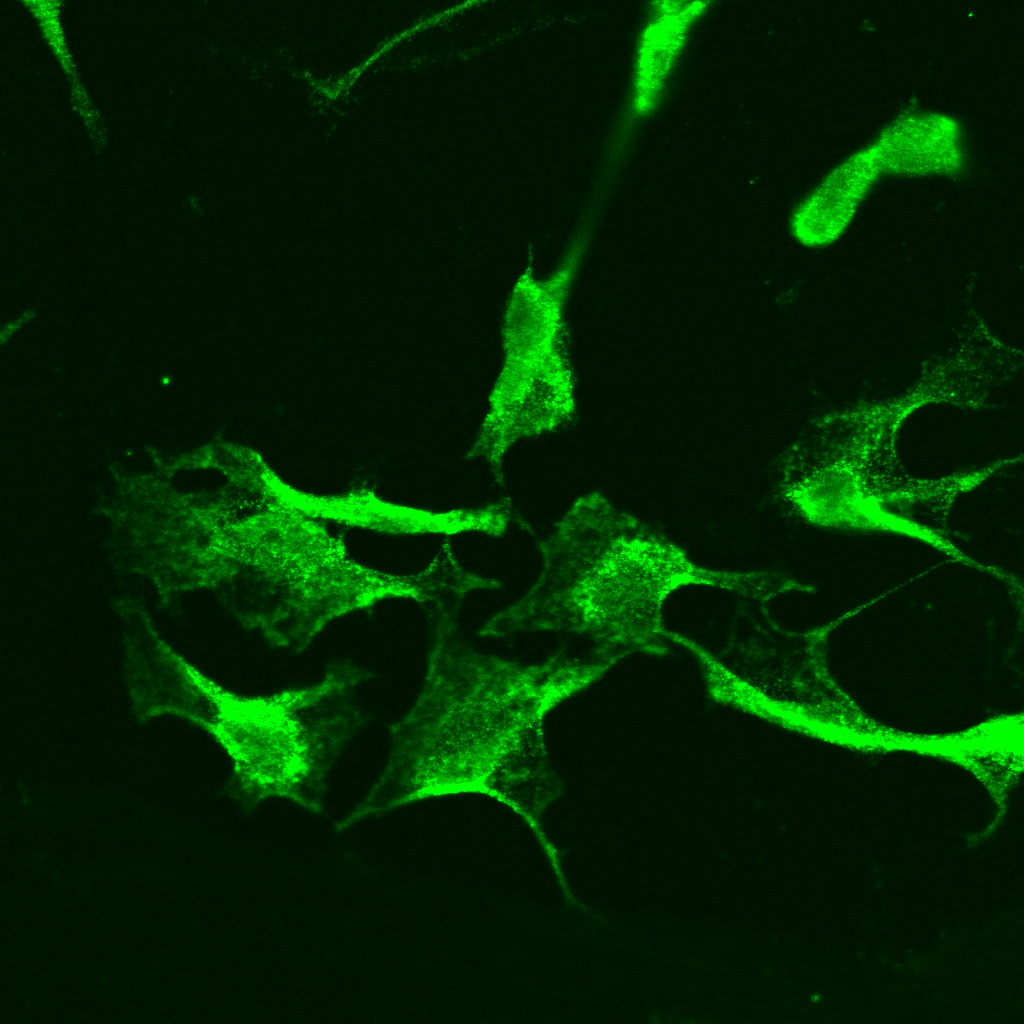

In [10]:
PIL.Image.open(str(Tat[1]))

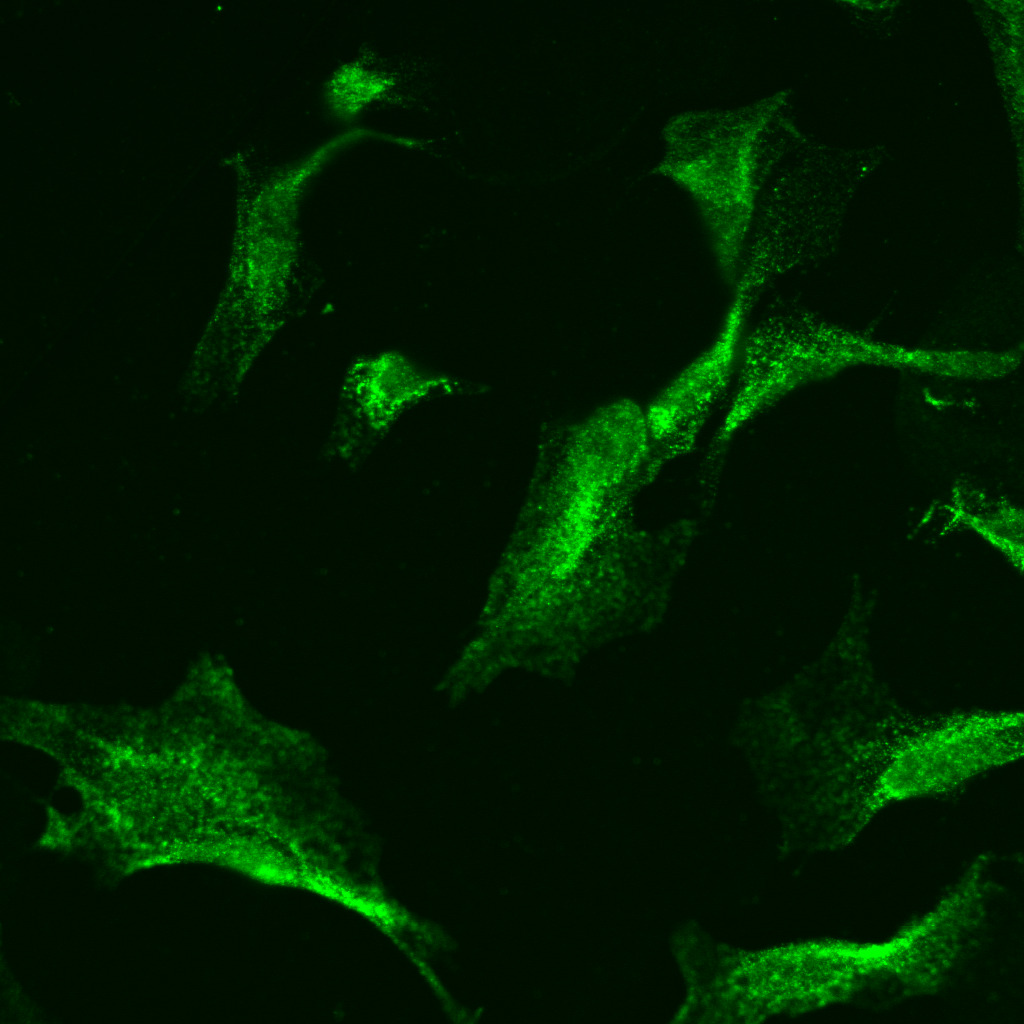

In [11]:
TatcART = list(data_dir.glob('TatcART/*'))
PIL.Image.open(str(TatcART[1]))

In [12]:
cART = list(data_dir.glob('cART/*'))
cART

[PosixPath('/content/drive/MyDrive/Data 2/cART/IFIT3 cART2.jpg'),
 PosixPath('/content/drive/MyDrive/Data 2/cART/IFIT3 cART 6.jpg'),
 PosixPath('/content/drive/MyDrive/Data 2/cART/IFIT3 cART 3.jpg'),
 PosixPath('/content/drive/MyDrive/Data 2/cART/IFIT3 cART1.jpg'),
 PosixPath('/content/drive/MyDrive/Data 2/cART/IFIT3 cART 5.jpg'),
 PosixPath('/content/drive/MyDrive/Data 2/cART/IFIT3 cART 4.jpg')]

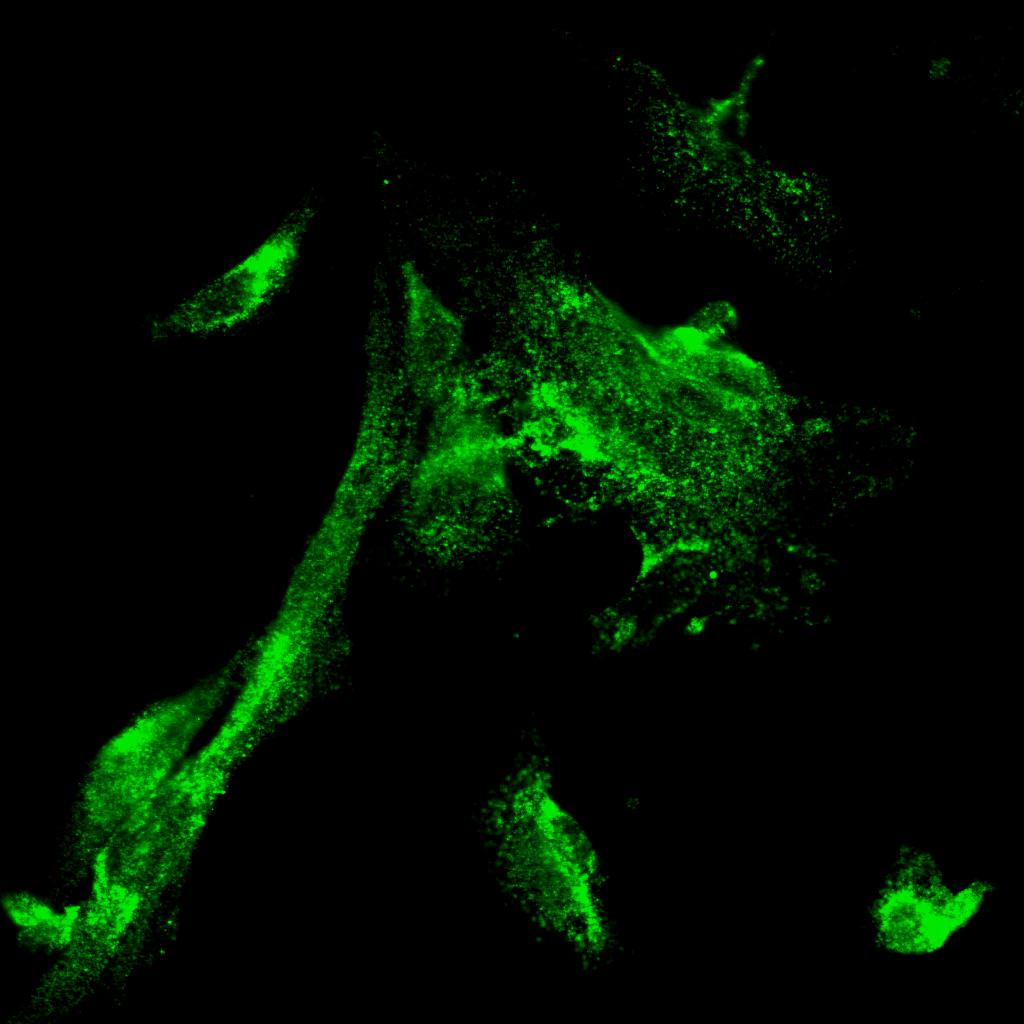

In [13]:
PIL.Image.open(str(cART[1]))

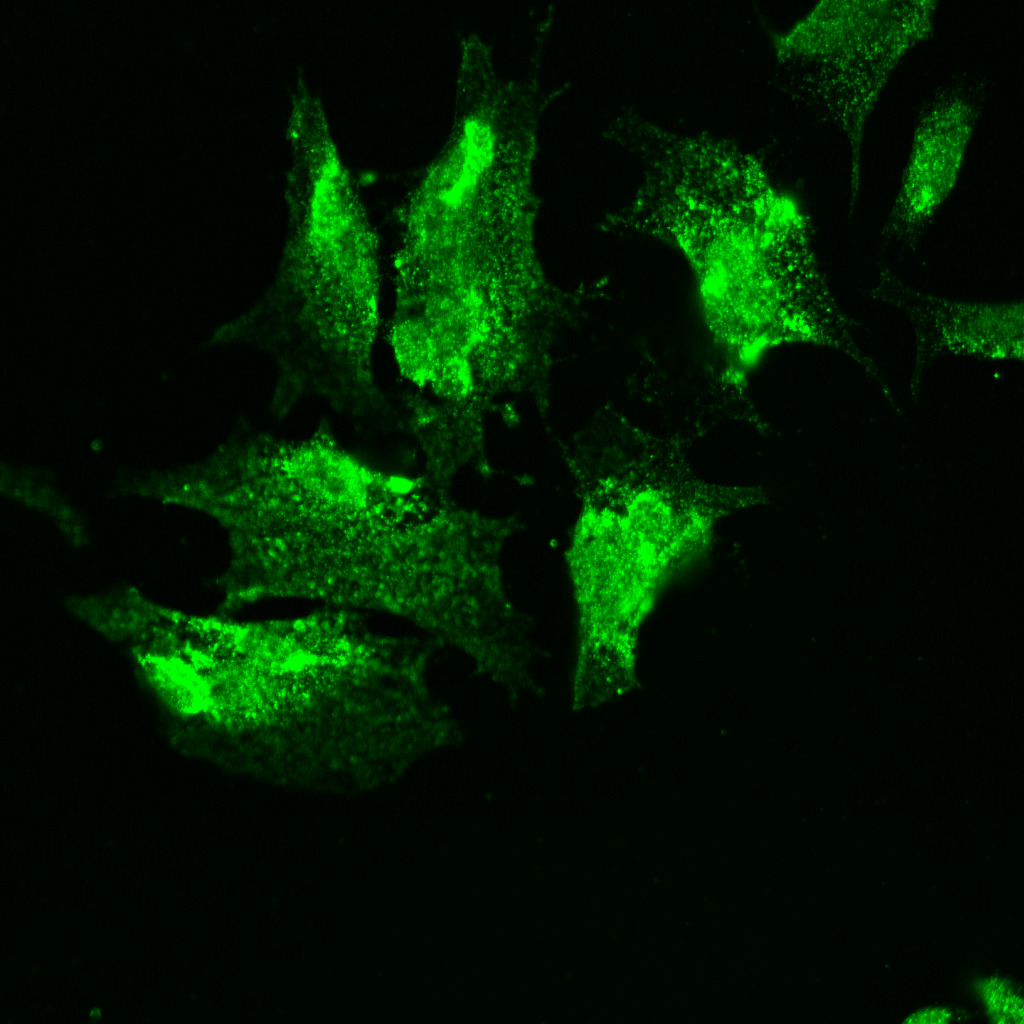

In [14]:
Control = list(data_dir.glob('Control/*'))
PIL.Image.open(str(Control[1]))

In [15]:
gen_images_dict = {
    'cART': list(data_dir.glob('cART/*')),
    'TatcART': list(data_dir.glob('TatcART/*')),
    'Control': list(data_dir.glob('Control/*')),
    'Tat': list(data_dir.glob('Tat/*')),
}

In [16]:
gen_images_dict['cART']

[PosixPath('/content/drive/MyDrive/Data 2/cART/IFIT3 cART2.jpg'),
 PosixPath('/content/drive/MyDrive/Data 2/cART/IFIT3 cART 6.jpg'),
 PosixPath('/content/drive/MyDrive/Data 2/cART/IFIT3 cART 3.jpg'),
 PosixPath('/content/drive/MyDrive/Data 2/cART/IFIT3 cART1.jpg'),
 PosixPath('/content/drive/MyDrive/Data 2/cART/IFIT3 cART 5.jpg'),
 PosixPath('/content/drive/MyDrive/Data 2/cART/IFIT3 cART 4.jpg')]

In [88]:
gen_labels_dict = {
    'cART': 0,
    'TatcART': 1,
    'Control': 2,
    'Tat': 3,
}

In [89]:
gen_images_dict['cART'][0]

PosixPath('/content/drive/MyDrive/Data 2/cART/IFIT3 cART2.jpg')

In [90]:
img = cv2.imread(str(gen_images_dict['cART'][0]))
img.shape

(1024, 1024, 3)

In [91]:
cv2.resize(img,(180,180)).shape

(180, 180, 3)

In [185]:
X, y = [], []

for gen_name, images in gen_images_dict.items():
    for image in images:
      img = cv2.imread(str(image))
      resized_img = cv2.resize(img,(180,180))
      X.append(resized_img)
      y.append(gen_labels_dict[gen_name])

In [93]:
y[:18]

[0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 2, 2, 2, 2, 2, 3, 3, 3]

In [94]:
X =np.array(X)
y =np.array(y)

In [95]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test =train_test_split(X,y,random_state=0) 

In [96]:
X_train_scaled = X_train / 255
X_test_scaled = X_test /255

In [97]:
num_classes = 4

model1 = Sequential([
    layers.Conv2D(16, 3, padding='same', activation='relu'), 
    layers.MaxPooling2D(),
    layers.Dropout(0.3),
    layers.Conv2D(32, 3, padding='same', activation='relu'), 
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, padding='same', activation='sigmoid'), 
    layers.MaxPooling2D(),
    layers.Dropout(0.3),
    layers.Conv2D(128, 3, padding='same', activation='sigmoid'), 
    layers.MaxPooling2D(),
    layers.Dropout(0.6),
    layers.Flatten (),
    layers. Dense(32, activation='relu'), 
    layers. Dense(64, activation='relu'), 
    layers. Dense(128, activation='relu'), 
    layers.Dense (num_classes)
])

In [98]:
model1.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [99]:
history1 = model1.fit(X_train_scaled, y_train, validation_data=(X_test_scaled,y_test), epochs=100,batch_size=32)

Epoch 1/100
1/1 [==============================] - 3s 3s/step - loss: 1.5841 - accuracy: 0.1538 - val_loss: 1.5686 - val_accuracy: 0.0000e+00
Epoch 2/100
1/1 [==============================] - 1s 874ms/step - loss: 1.3972 - accuracy: 0.3077 - val_loss: 1.4701 - val_accuracy: 0.2000
Epoch 3/100
1/1 [==============================] - 1s 1s/step - loss: 1.3079 - accuracy: 0.3846 - val_loss: 1.6231 - val_accuracy: 0.2000
Epoch 4/100
1/1 [==============================] - 1s 1s/step - loss: 1.4298 - accuracy: 0.3846 - val_loss: 1.6293 - val_accuracy: 0.2000
Epoch 5/100
1/1 [==============================] - 1s 1s/step - loss: 1.4043 - accuracy: 0.3846 - val_loss: 1.4647 - val_accuracy: 0.2000
Epoch 6/100
1/1 [==============================] - 1s 1s/step - loss: 1.3866 - accuracy: 0.3846 - val_loss: 1.4203 - val_accuracy: 0.2000
Epoch 7/100
1/1 [==============================] - 1s 655ms/step - loss: 1.3409 - accuracy: 0.3846 - val_loss: 1.4107 - val_accuracy: 0.2000
Epoch 8/100
1/1 [=======

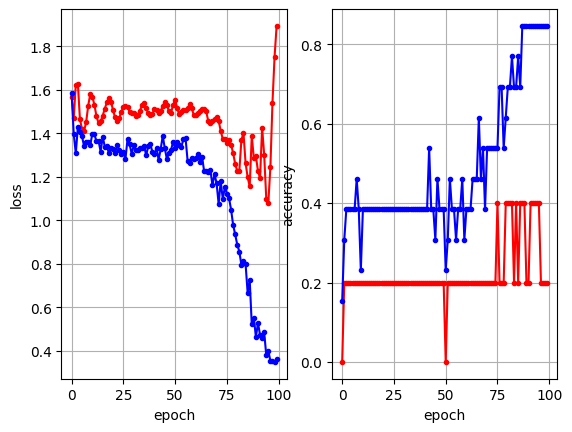

In [100]:
y_vloss = history1.history['val_loss'] 
y_loss = history1.history['loss'] 
y_acc = history1.history['accuracy'] 
y_vacc = history1.history['val_accuracy'] 

fig, (ax1, ax2) = plt.subplots (1, 2) 
ax1.plot(np.arange (len (y_vloss)), y_vloss, marker='.', c='red') 
ax1.plot(np.arange (len (y_loss)), y_loss, marker='.', c='blue') 
ax1.grid() 
plt.setp(ax1, xlabel='epoch', ylabel='loss')

ax2.plot(np.arange (len (y_vacc)), y_vacc, marker='.', c='red') 
ax2.plot(np.arange (len (y_acc)), y_acc, marker='.', c='blue') 
ax2.grid() 
plt.setp(ax2, xlabel='epoch', ylabel='accuracy') 

plt.show()

In [106]:
model1.evaluate(X_test_scaled,y_test)

1/1 [==============================] - 0s 79ms/step - loss: 1.8941 - accuracy: 0.2000


[1.8940788507461548, 0.20000000298023224]

In [102]:
predictions1 = model1.predict(X_test_scaled)
predictions1

1/1 [==============================] - 0s 170ms/step


array([[ 0.3342914 , -1.343794  ,  3.000669  ,  1.3021637 ],
       [ 2.9015672 ,  1.3928632 ,  0.12186335, -0.3600412 ],
       [ 1.4808986 , -0.42571744,  3.2997878 , -0.7992217 ],
       [-0.10714179, -1.7517745 ,  2.5577753 ,  2.6151583 ],
       [ 0.18281202, -1.5773007 ,  3.558911  ,  0.97057956]],
      dtype=float32)

In [103]:
y_pred1 = np.argmax(model1.predict(X_test_scaled), axis=1)
y_pred1

1/1 [==============================] - 0s 120ms/step


array([2, 0, 2, 3, 2])

In [104]:
#importing confusion matrix
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
confusionmatrix1 = confusion_matrix(y_test, y_pred1)
confusionmatrix1

array([[0, 0, 1, 0],
       [1, 0, 1, 0],
       [0, 0, 1, 1],
       [0, 0, 0, 0]])

In [105]:
target_names = ['class 1', 'class 2', 'class 3','class 4']
print(classification_report(y_test, y_pred1, target_names=target_names))

              precision    recall  f1-score   support

     class 1       0.00      0.00      0.00         1
     class 2       0.00      0.00      0.00         2
     class 3       0.33      0.50      0.40         2
     class 4       0.00      0.00      0.00         0

    accuracy                           0.20         5
   macro avg       0.08      0.12      0.10         5
weighted avg       0.13      0.20      0.16         5



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.